# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 12: Worst Case Mean Variance Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,-0.1466%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2737%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1386%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6435%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9918%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5019%,0.0000%,0.0000%,8.4807%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8262%,0.0000%,0.0000%,0.0000%,0.0000%,7.1805%,0.0000%,0.0000%,4.2738%,0.0000%


### 2.2 Plotting portfolio composition

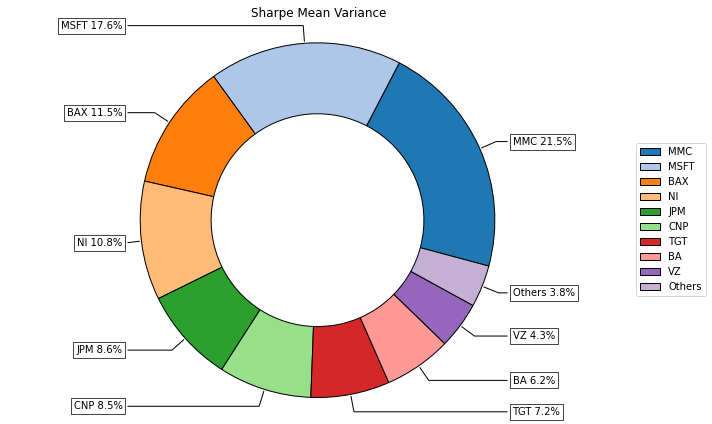

In [4]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

title = 'Sharpe Mean Variance'

ax = plf.plot_pie(w=w, title=title, others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

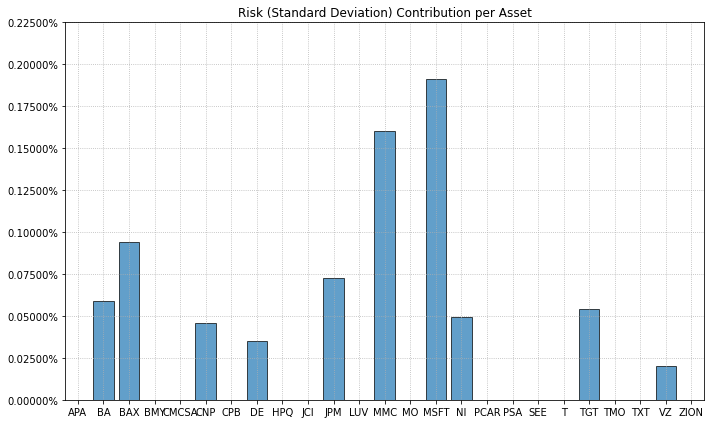

In [5]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Worst Case Mean Variance Portfolios with Box Uncertainty Sets based on Bootstrapping.

### 3.1 Calculating the worst case mean variance portfolio.

I'm going to use box uncertainty sets and the parameters of this sets are going to be estimated through block bootstrapping. This means that the limits of uncertainty sets are based on percentiles.

In [6]:
# Select method and estimate worst case input parameters:

box = 's' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0 

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = 'box' # Type of uncertainty set for covariance matrix

w_wc_1 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_1.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,9.8947%,0.0000%,0.0000%,4.1577%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 3.2 Plotting portfolio composition

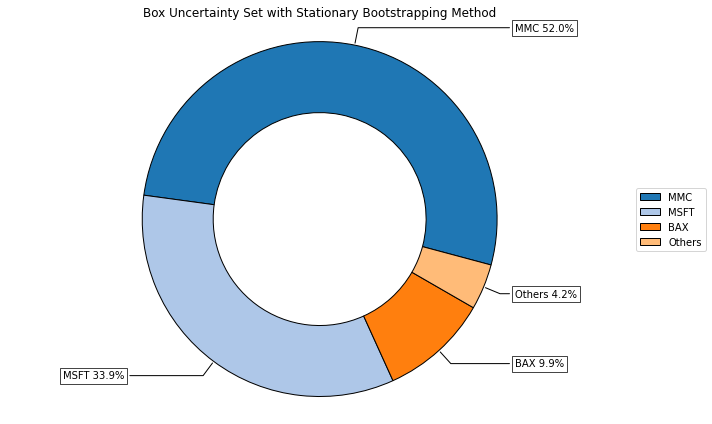

In [7]:
# Plotting the composition of the portfolio

title = 'Box Uncertainty Set with Stationary Bootstrapping Method'

ax = plf.plot_pie(w=w_wc_1, title=title, others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

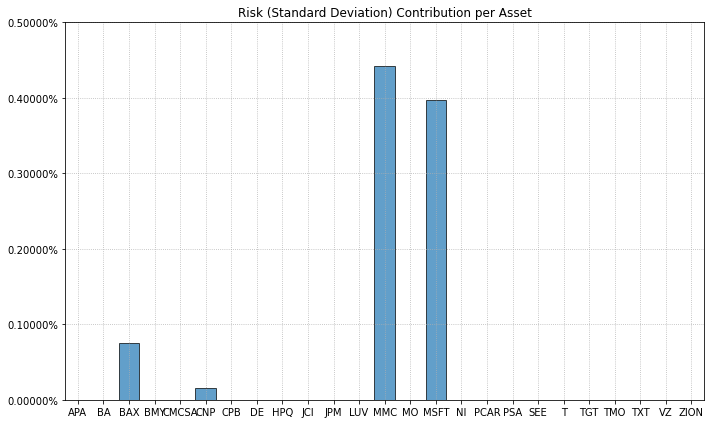

In [8]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w_wc_1, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

## 4. Estimating Worst Case Mean Variance Portfolios with Box Uncertainty Sets based on Delta method.

### 4.1 Calculating the worst case mean variance portfolio.

I'm going to use box uncertainty sets and the parameters of this sets are going to be estimated through delta method. This method consist in increase and decrease the mean vector and/or covariance matrix in a percentage in absolute value.

In [9]:
# Select method and estimate worst case input parameters:

box = 'd' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = 'box' # Type of uncertainty set for covariance matrix

w_wc_2 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_2.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,4.0422%,10.3919%,0.0000%,0.5426%,10.0636%,0.5361%,2.3106%,0.0000%,0.0000%,...,15.0905%,0.0000%,1.0967%,0.0000%,0.4063%,6.7743%,0.0000%,0.0000%,10.8830%,0.0000%


### 4.2 Plotting portfolio composition

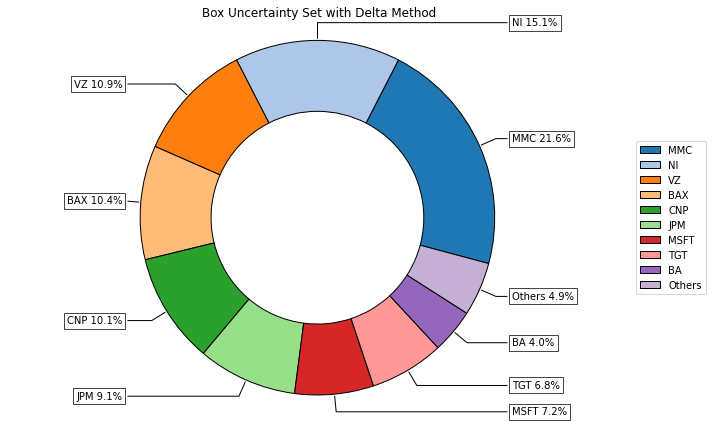

In [10]:
# Plotting the composition of the portfolio

title = 'Box Uncertainty Set with Delta Method'

ax = plf.plot_pie(w=w_wc_2, title=title, others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 4.3 Plotting risk composition

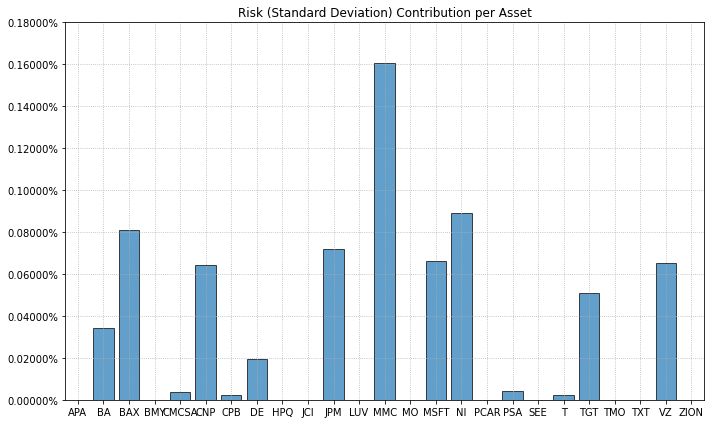

In [11]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w_wc_2, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

## 5. Estimating Worst Case Mean Variance Portfolios with Elliptical Uncertainty Sets based on Bootstrapping.

### 5.1 Calculating the worst case mean variance portfolio.

I'm going to use elliptical uncertainty set for mean vector and covariance matrix. The parameters of this sets are going to be estimated through stationary block bootstrapping.

In [12]:
# Select method and estimate worst case input parameters:

box = 's' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'ellip' # Type of uncertainty set for mean vector
Ucov = 'ellip' # Type of uncertainty set for covariance matrix

w_wc_3 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_3.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,4.6268%,7.8148%,0.7161%,4.6038%,7.3652%,1.4103%,4.3738%,2.4742%,2.8209%,...,6.7896%,3.8165%,1.5040%,0.0000%,3.8121%,3.1355%,6.5161%,0.0000%,5.8883%,2.9773%


### 5.2 Plotting portfolio composition

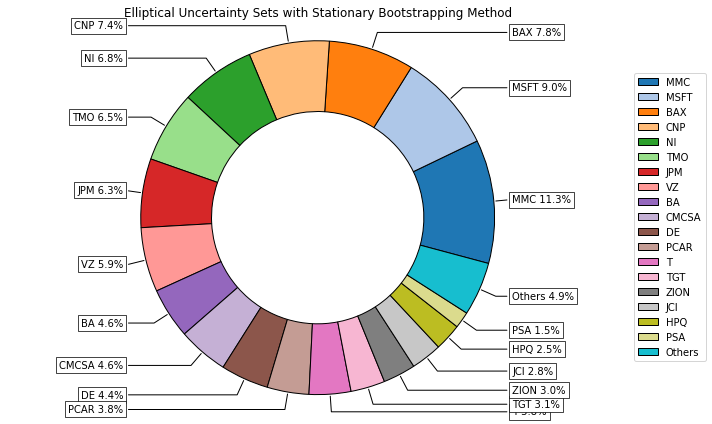

In [13]:
# Plotting the composition of the portfolio

title = 'Elliptical Uncertainty Sets with Stationary Bootstrapping Method'

ax = plf.plot_pie(w=w_wc_3, title=title, others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)

### 5.3 Plotting risk composition

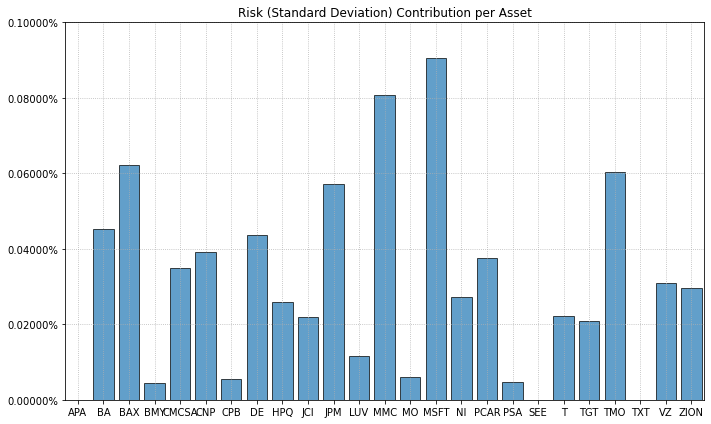

In [14]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w_wc_3, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

## 6. Estimating Worst Case Mean Variance Portfolios with Elliptical Uncertainty Sets based on Normallity Assumptions.

### 6.1 Calculating the worst case mean variance portfolio.

I'm going to use elliptical uncertainty set for mean vector and covariance matrix. The parameters of this sets are going to be estimated assuming that the mean vector follows a multivariate normal distribution and the covariance matrix follows a wishart distribution.

In [15]:
# Select method and estimate worst case input parameters:

box = 'n' # Method to estimate box uncertainty sets parameters
ellip = 'n' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'ellip' # Type of uncertainty set for mean vector
Ucov = 'ellip' # Type of uncertainty set for covariance matrix

w_wc_4 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc_4.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,4.8543%,7.6793%,0.6838%,4.2968%,6.9704%,1.3413%,4.5816%,2.8684%,2.8780%,...,6.2187%,3.8479%,1.3726%,0.0000%,3.9456%,3.4813%,6.5272%,0.0000%,6.2324%,3.3084%


### 6.2 Plotting portfolio composition

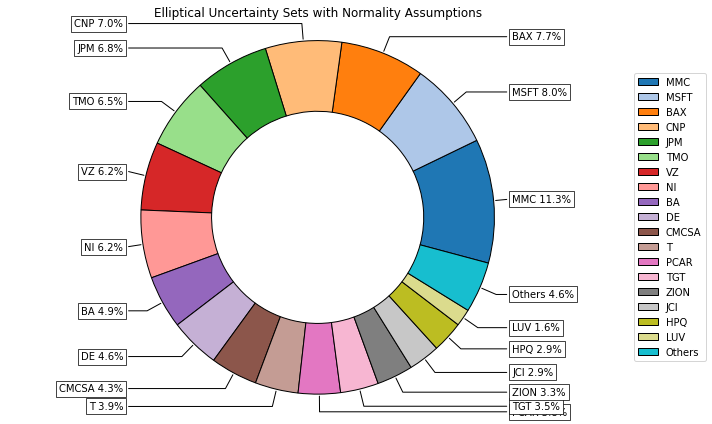

In [16]:
# Plotting the composition of the portfolio

title = 'Elliptical Uncertainty Sets with Normality Assumptions'

ax = plf.plot_pie(w=w_wc_4, title=title, others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)

### 6.3 Plotting risk composition

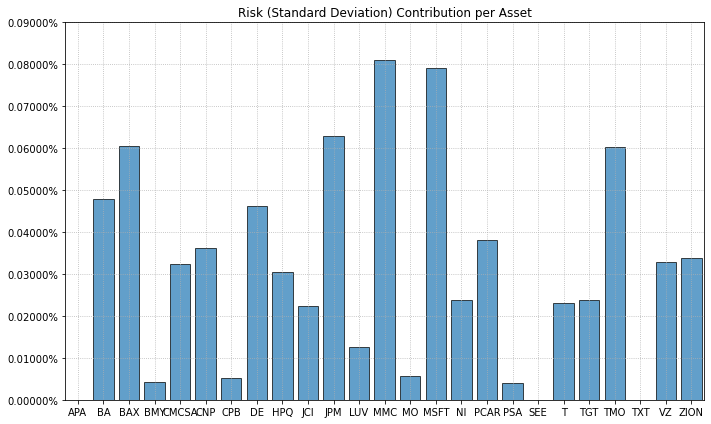

In [17]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w_wc_4, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

Finally, you can try several combinations of differents uncertainty sets and estimation methods of parameters.